## Coach Lab Linear Regression

### Objectives
*Put together a linear regression model <br>
*Understand the steps in modeling<br>
*Evaluate linear regression model
<br>
<img src="new_crisp-dm.png" width=400>


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### For this lesson we will use the computer hardware dataset from https://www.mldata.io/dataset-details/computer_hardware/

In [2]:
comp = pd.read_csv('computer_hardware_dataset.csv')

### Project Question Formulation


What do we want to evaluate/explore/answer????

In [3]:
comp.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   model_name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [5]:
comp.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


### Step 1 Train/test Split
#### Target is PRP

In [81]:
# create y and X as the target and the features
y = comp['PRP']
X = comp.drop(columns=['PRP'])

In [82]:
#split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [8]:
#get shape of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((156, 9), (156,), (53, 9), (53,))

### Step 2- Exploratory Data Analysis 

We will use only the training data for this part

#### As a first step in data cleaning lets look for missing values

#### Next let's look at the distribution of our variables

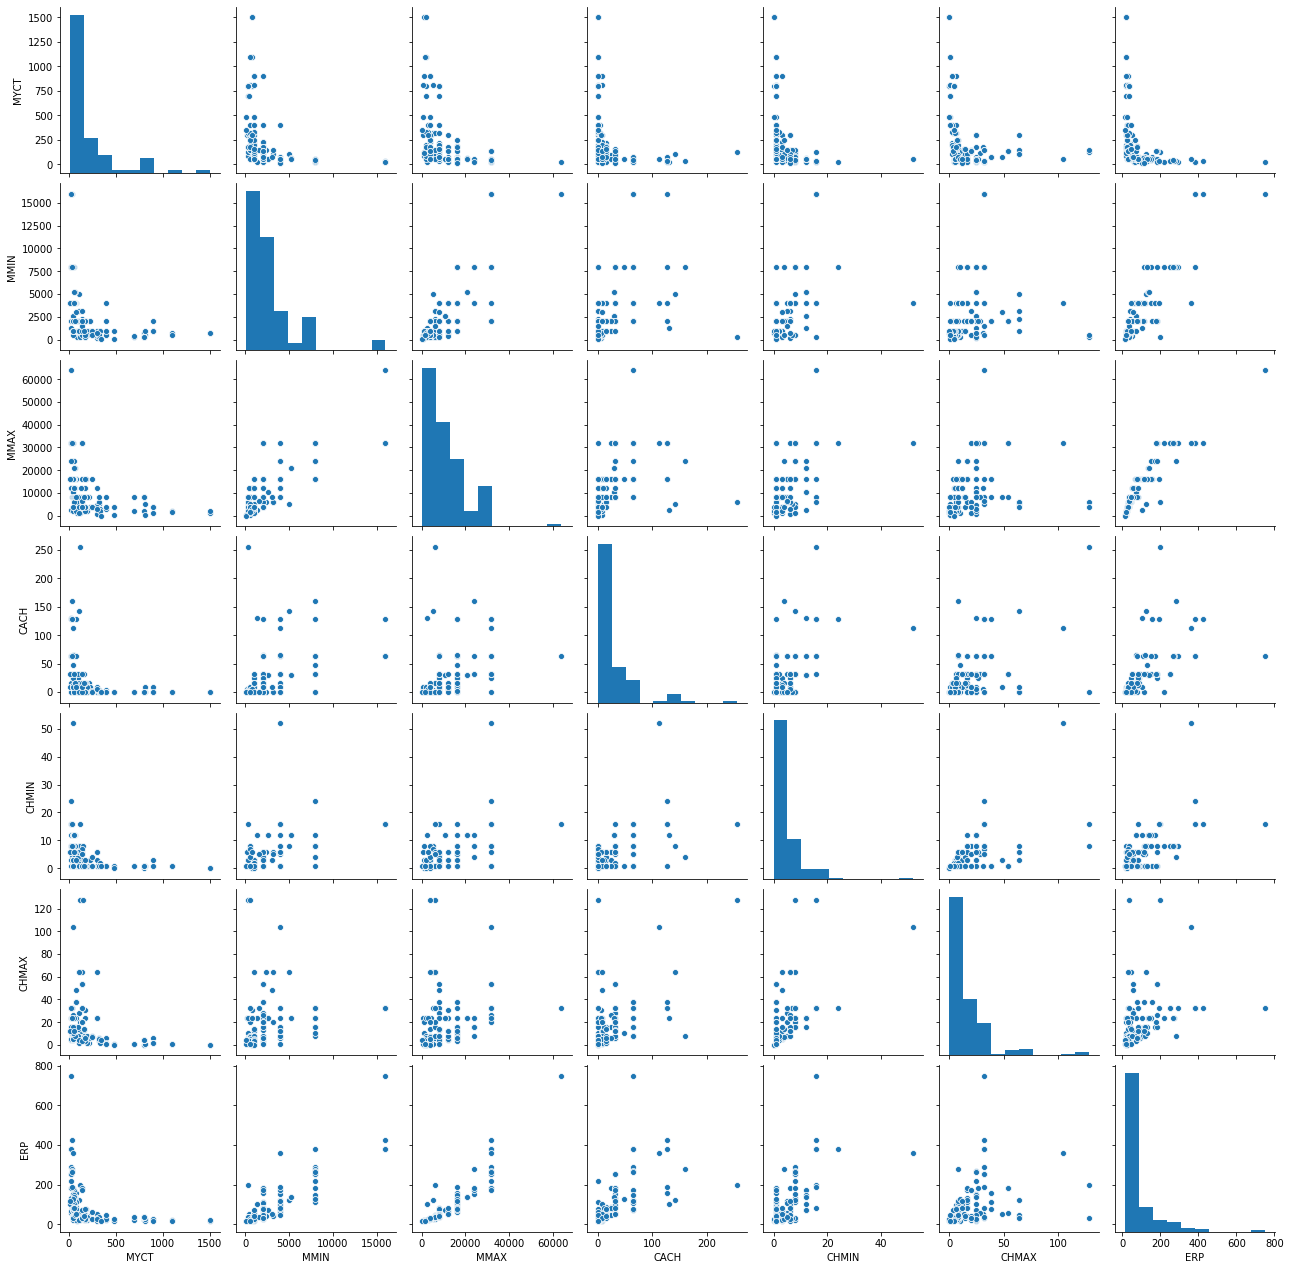

In [9]:
#create scatterplot matrix
sns.pairplot(X_train)

#### Next let's look at the distribution of our target

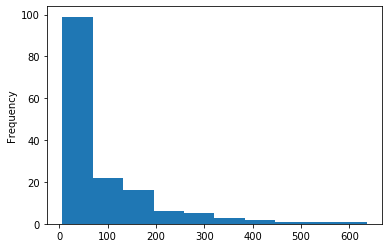

In [10]:
#histogram of y_train
y_train.plot(kind='hist')

#### Do we have any categorical variables we need to encode?

In [14]:
X_train['vendor_name'].nunique()

29

In [15]:
X_train['model_name'].value_counts()

4361-4                1
cyber:170/815         1
dps:8/50              1
50-250-ii             1
50-550-ii             1
f4000/100             1
8130-a                1
4341-2                1
3083:e                1
3000/64               1
eclipse:mv/4000       1
m80/42                1
concept:32/8705       1
dps:7/55              1
b2900                 1
as/7000               1
7.865-2               1
2000/260              1
universe:68/05        1
eclipse:mv/6000       1
dps:8/52              1
dps:6/35              1
v8545:ii              1
3205                  1
50-850-ii             1
1636-10               1
7.551                 1
4445                  1
universe:68           1
v8565:ii              1
b5920                 1
38/4                  1
38/7                  1
v8595:ii              1
omega:480-i           1
4381-1                1
580-5860              1
v8585:ii              1
cyber:170/835         1
7.536                 1
as/6620               1
1641-11         

In [83]:
X_train = X_train.drop(columns=['model_name'])

In [19]:
X_test = X_test.drop(columns=['model_name'])

In [80]:
X_train.head()

,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,dg,formation,four-phase,gould,harris,honeywell,hp,ibm,ipl,magnuson,microdata,nas,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,wang,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,dg,formation,four-phase,gould,harris,honeywell,hp,ibm,ipl,magnuson,microdata,nas,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,wang,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,dg,formation,four-phase,gould,harris,honeywell,hp,ibm,ipl,magnuson,microdata,nas,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,wang,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,320,256,5000,4,1,6,27
19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,5000,5000,142,8,64,124
135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,50,2000,16000,24,6,16,88
139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,115,2000,4000,2,1,5,29
66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,90,256,1000,0,3,10,18


#### Alternative way to Scale/transform data using columntransformer

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

numeric_features = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['vendor_name']
categorical_transformer = Pipeline(steps=[
    ("ordinal", OrdinalEncoder()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

#let's use it now!

X_train_tran = (preprocessor.fit_transform(X_train))
X_train_tran

<156x36 sparse matrix of type '<class 'numpy.float64'>'
	with 1248 stored elements in Compressed Sparse Row format>

That transformer worked but gave us a sparse condensed matrix.  Let's fix this...

In [88]:
X_train_trans = pd.DataFrame.sparse.from_spmatrix(X_train_tran)
X_train_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.391590,-0.773932,-0.616741,-0.515872,-0.547161,-0.515874,-0.578356,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.373833,0.777799,-0.616741,3.182327,0.659909,2.314707,0.401127,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.592525,-0.203481,0.485941,0.020099,0.315032,-0.027843,0.037608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.355609,-0.203481,-0.716985,-0.569469,-0.547161,-0.564677,-0.558161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.446730,-0.773932,-1.017717,-0.623066,-0.202284,-0.320661,-0.669236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


OK, I could still improve this by adding column names, but still.  This can be used in our modeling so it was successful!!

#### Next let's scale our data

Why do we do this?  What does it mean about the comparability of our variables?  What about interpretation of coefficients?

In [29]:
dummies=pd.get_dummies(X_train['vendor_name'], drop_first=True)
X_train = pd.concat([dummies, X_train], axis=1)
X_train = X_train.drop(columns=['vendor_name'])

KeyError: 'vendor_name'

In [30]:
X_train.head()

,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,dg,formation,four-phase,gould,harris,honeywell,hp,ibm,ipl,magnuson,microdata,nas,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,wang,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,dg,formation,four-phase,gould,harris,honeywell,hp,ibm,ipl,magnuson,microdata,nas,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,wang,amdahl,apollo,basf,bti,burroughs,c.r.d,cambex,cdc,dec,dg,formation,four-phase,gould,harris,honeywell,hp,ibm,ipl,magnuson,microdata,nas,ncr,nixdorf,perkin-elmer,prime,siemens,sperry,wang,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,320,256,5000,4,1,6,27
19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,5000,5000,142,8,64,124
135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,50,2000,16000,24,6,16,88
139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,115,2000,4000,2,1,5,29
66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,90,256,1000,0,3,10,18


In [56]:
ss = StandardScaler()
X_train_cont=X_train[['MYCT', "MMIN", 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP']]
X_train_cont = pd.DataFrame(ss.fit_transform(X_train_cont), columns=X_train_cont.columns)
X_train_scaled = dummies.join(X_train_cont, on=X_train_cont.index)


In [57]:
X_train_scaled.shape

(156, 35)

#### Outlier Removal

### Step 4 - Messy Model

#### First let's use statsmodels

In [44]:
X_train_scaled.shape

(192, 35)

In [58]:
#Linear regression using statsmodels
X_train_const = sm.add_constant(X_train_scaled)
model =sm.OLS(y_train, X_train_const, hascont=True)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     39.33
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.05e-50
Time:                        16:48:36   Log-Likelihood:                -751.61
No. Observations:                 156   AIC:                             1575.
Df Residuals:                     120   BIC:                             1685.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -34.6839     56.779     -0.611      0.542    -147.102      77.734
amdahl         107.5262     62.054      1.733      0.086     -15.336     230.388
apollo         146.1055     62.893      2.323      0.022      21.583     270.628
basf           136.1935     60.749      2.242      0.027      15.914     256.473
bti            123.2770     66.670      1.849      0.067      -8.725     255.279
burroughs       90.5436     53.037      1.707      0.090     -14.466     195.553
c.r.d          147.3593     60.269      2.445      0.016      28.031     266.688
cambex         113.3258     61.617      1.839      0.068      -8.672     235.324
cdc            136.3239     58.728      2.321      0.022      20.046     252.602
dec            143.6928     60.456      2.377      0.019      23.994     263.391
dg             151.4316     60.632      2.498      0.014      31.384     271.479
formation      134.3828     62.560      2.148      0.034      10.518     258.248
four-phase     118.7175     66.335      1.790      0.076     -12.622     250.057
gould          171.4324     51.851      3.306      0.001      68.770     274.095
harris         136.3144     56.606      2.408      0.018      24.238     248.391
honeywell      115.4499     54.667      2.112      0.037       7.214     223.686
hp             113.9447     56.737      2.008      0.047       1.609     226.280
ibm            138.7279     60.205      2.304      0.023      19.525     257.930
ipl            124.9282     60.990      2.048      0.043       4.173     245.684
magnuson        99.2236     60.633      1.636      0.104     -20.826     219.273
microdata       44.7166     58.878      0.759      0.449     -71.859     161.292
nas            136.3732     58.943      2.314      0.022      19.670     253.076
ncr             88.7634     58.204      1.525      0.130     -26.476     204.002
nixdorf        128.0779     67.474      1.898      0.060      -5.515     261.671
perkin-elmer   137.1088     61.703      2.222      0.028      14.941     259.276
prime          140.4225     58.276      2.410      0.017      25.039     255.806
siemens        114.4546     60.110      1.904      0.059      -4.558     233.467
sperry         112.1591     57.965      1.935      0.055      -2.607     226.926
wang           156.8209     68.247      2.298      0.023      21.696     291.946
MYCT            -6.6383      4.298     -1.545      0.125     -15.147       1.870
MMIN            16.9885      7.242      2.346      0.021       2.650      31.327
MMAX           -12.1111      9.455     -1.281      0.203     -30.831       6.609
CACH            10.0145      5.831      1.718      0.088      -1.530      21.559
CHMIN            9.5296      5.729      1.663      0.099      -1.814      20.873
CHMAX           11.5615      7.700      1.501      0.136      -3.684      26.807
ERP  

#### Now let's use sklearn

In [59]:
#initialize a linear regression model in sklearn
linreg = LinearRegression()

In [67]:
#fit linear model to training data
linreg.fit(X_train_scaled, y_train)
linreg.score(X_train_scaled, y_train)


0.9198189206958429

### Step 5 - Model Evaluation

In [ ]:
#get summary statistics from statsmodels


In [68]:
#get r squared value from sklearn
X_train_scaled.shape

(156, 35)

In [65]:
#create formula for adjusted r squared
def adjusted_r_suared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [69]:
#calculate adjusted r squared
adjusted_r_suared(.919, 156, 35)

0.895375

#### What does the r-squared value mean? What do the r-squared values tell us about the fit of our model?  What about adjusted r-squared?

#### Now let's look at predictions of relative performance to compare to actual relative performance

In [ ]:
linreg_results_df = pd.DataFrame(linreg.predict(X_train), y_train).reset_index()

In [ ]:
linreg_results_df.columns = ['Actual_Price', 'Predicted_Price']

In [ ]:
linreg_results_df.head()

## Let's use regularization to see if that helps our model fit

In [70]:
#importing Lasso and Ridge models from sklearn
from sklearn.linear_model import Lasso, Ridge

### Lasso Regularizer

In [72]:
#conduct lasso regression on training data
lasso = Lasso()

In [73]:
#Evaluation of lasso on training data
lasso.fit(X_train_scaled, y_train)
lasso.score(X_train_scaled, y_train)

0.8964087300173567

In [74]:
#examine coefficients from lasso
lasso.coef_

array([ -0.        ,   0.        ,   0.        ,  -0.        ,
        -0.        ,   0.        ,  -0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
         5.9974954 ,   0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
         0.        , -17.57385624,   0.        ,   0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
        -1.04760553,  15.6281026 ,   0.        ,  12.36200682,
        10.84659371,   0.        ,  69.09394998])

### Ridge Regularizer

In [76]:
#conduct ridge regression on training data
ridge = Ridge()

In [77]:
#Evaluation of ridge on training data
ridge.fit(X_train_scaled, y_train)
ridge.score(X_train_scaled, y_train)

0.9149848810421392

In [78]:
#examine coefficients from ridge
ridge.coef_

array([-1.39391591e+01,  1.22901314e+01,  7.37808258e+00, -2.87614130e-01,
       -1.44176043e+01,  1.60910219e+01, -1.53679490e+01,  9.37266433e+00,
        1.12186123e+01,  1.71204490e+01, -5.92316139e-01, -7.57964792e-01,
        4.91118786e+01,  1.49661529e+01, -8.38127719e-01, -7.94870468e-01,
        5.74540312e+00, -4.00367670e+00, -2.35265800e+01, -8.35444417e+00,
        7.40625514e+00, -3.25653777e+01,  1.03179496e+00,  6.16508205e+00,
        1.45040154e+01, -1.23468325e+01, -1.03146776e+01,  1.30560822e+01,
       -3.99865635e+00,  2.03416348e+01, -3.84011098e-01,  9.92451892e+00,
        1.49047205e+01,  5.25154715e-02,  6.64645464e+01])

### Step 6 - Best Model Evaluation

In [ ]:
#apply data cleaning process to test set

In [ ]:
#run best model on test set

### Step 7 - Model Interpretation

What take-ways do we have?  Conclusions about our initial question?  Who would care?  Why do they care?